# **Pizza vs Steak classifier**

In [ ]:
## import data by using google drive download
## use !pip install gdown if not installed
## google colab has installation

import gdown
!gdown --id 1TwtxuFvaAVzkd-_EA6hPHps_jd2720pH

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1TwtxuFvaAVzkd-_EA6hPHps_jd2720pH
From (redirected): https://drive.google.com/uc?id=1TwtxuFvaAVzkd-_EA6hPHps_jd2720pH&confirm=t&uuid=7fe5b814-d92a-4829-92c5-e01feb6470b1
To: /content/pizza_steak.zip
100% 110M/110M [00:02<00:00, 51.7MB/s]


In [ ]:
## use the code below to extract
import zipfile
zip_ref = zipfile.ZipFile('/content/pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
#ls - list all files
#this is the main folder
!ls pizza_steak/

test  train


In [ ]:
## training set
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

## **Training and Test Split**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.random.set_seed(630)

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

In [ ]:
## image sizes (224 x 224)
train_data = train_datagen.flow_from_directory(train_dir, batch_size = 32, target_size =  (224,224), class_mode = 'binary', seed = 630)
test_data = test_datagen.flow_from_directory(test_dir, batch_size = 32, target_size =  (224,224), class_mode = 'binary', seed = 630)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


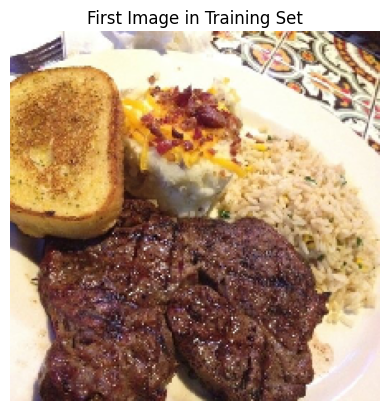

In [ ]:
import matplotlib.pyplot as plt

# Retrieve the first batch of images from the train_data generator
batch_images, batch_labels = train_data.next()

# Plot the first image from the batch
plt.imshow(batch_images[0])
plt.title('First Image in Training Set')
plt.axis('off')  # Hide axis
plt.show()


In [ ]:
batch_labels[0]

1.0

In [ ]:
# Get the class indices (dictionary mapping class names to indices)
class_indices = train_data.class_indices

# Print the class indices
print("Class Indices:", class_indices)


Class Indices: {'pizza': 0, 'steak': 1}


## **Build your model here**

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Input

In [ ]:
cnn = Sequential()

cnn.add(Input(shape=(224,224,3)))
cnn.add(Conv2D(40, kernel_size=3, activation = "relu" ))
cnn.add(MaxPool2D())
cnn.add(Dropout(0.1))

cnn.add(Conv2D(20, kernel_size=(3,3), activation = "relu" ))
cnn.add(MaxPool2D())
cnn.add(Dropout(0.1))

cnn.add(Conv2D(10, kernel_size=(3,3), activation = "relu" ))
cnn.add(MaxPool2D())
cnn.add(Dropout(0.1))

cnn.add(Flatten())

cnn.add(Dense(60, activation = "relu"))
cnn.add(Dropout(0.1))
cnn.add(Dense(1, activation = "sigmoid"))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 40)      1120      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 40)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 40)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 20)      7220      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 20)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 20)        0

In [ ]:
from keras.callbacks import EarlyStopping
## compile
cnn.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience = 10)

## fit
cnn.fit(train_data, batch_size = 100, epochs = 100, callbacks = callback, validation_data = (test_data))

Epoch 1/100
47/47 [==============================] - 18s 164ms/step - loss: 0.6359 - accuracy: 0.6233 - val_loss: 0.5601 - val_accuracy: 0.7620
Epoch 2/100
47/47 [==============================] - 7s 156ms/step - loss: 0.4984 - accuracy: 0.7587 - val_loss: 0.4546 - val_accuracy: 0.8000
Epoch 3/100
47/47 [==============================] - 6s 132ms/step - loss: 0.4474 - accuracy: 0.7987 - val_loss: 0.4218 - val_accuracy: 0.8320
Epoch 4/100
47/47 [==============================] - 7s 144ms/step - loss: 0.4111 - accuracy: 0.8307 - val_loss: 0.4872 - val_accuracy: 0.7680
Epoch 5/100
47/47 [==============================] - 7s 146ms/step - loss: 0.3794 - accuracy: 0.8327 - val_loss: 0.4184 - val_accuracy: 0.8400
Epoch 6/100
47/47 [==============================] - 6s 132ms/step - loss: 0.3178 - accuracy: 0.8627 - val_loss: 0.3976 - val_accuracy: 0.8260
Epoch 7/100
47/47 [==============================] - 7s 145ms/step - loss: 0.2942 - accuracy: 0.8760 - val_loss: 0.3695 - val_accuracy: 0.830

16/16 [==============================] - 2s 84ms/step
Accuracy: 0.5


<Figure size 800x600 with 0 Axes>

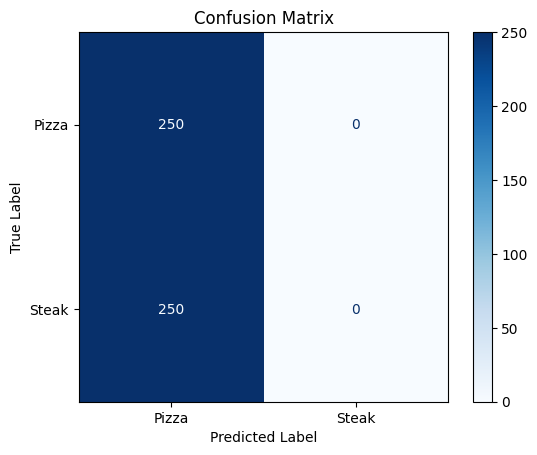

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

y_pred_classes = np.argmax(cnn.predict(test_data), axis=1)

y_true = test_data.classes

accuracy = accuracy_score(y_true, y_pred_classes)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm, display_labels=["Pizza", "Steak"]).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## **Compare to other models**

Mobile Net

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Dense

In [ ]:
base_model = MobileNetV2(input_shape=(224,224,3), include_top= False, weights="imagenet")

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
## TRANSFER MODEL (cut off after convolutions and poolings)
## attach my model
cnn1 = base_model.output
cnn1 = GlobalAveragePooling2D()(cnn1) # passing along the previous output
cnn1 = Dense(1024, activation = "relu")(cnn1)
predictions = Dense(1, activation = "sigmoid")(cnn1)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.models import Model ## put together two models

mobilenet_cnn1 = Model(inputs=base_model.input, outputs = predictions)

In [ ]:
mobilenet_cnn1.compile(optimizer="adam", loss="binary_crossentropy", metrics = ['accuracy'])

In [ ]:
mobilenet_cnn1.fit(train_data, epochs=100, validation_data=test_data)

Epoch 1/100
47/47 [==============================] - 13s 178ms/step - loss: 0.1755 - accuracy: 0.9353 - val_loss: 0.0355 - val_accuracy: 0.9900
Epoch 2/100
47/47 [==============================] - 7s 142ms/step - loss: 0.0416 - accuracy: 0.9880 - val_loss: 0.0547 - val_accuracy: 0.9820
Epoch 3/100
47/47 [==============================] - 6s 128ms/step - loss: 0.0195 - accuracy: 0.9947 - val_loss: 0.0529 - val_accuracy: 0.9860
Epoch 4/100
47/47 [==============================] - 7s 141ms/step - loss: 0.0082 - accuracy: 0.9987 - val_loss: 0.0549 - val_accuracy: 0.9860
Epoch 5/100
47/47 [==============================] - 7s 151ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0583 - val_accuracy: 0.9840
Epoch 6/100
47/47 [==============================] - 7s 143ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0581 - val_accuracy: 0.9860
Epoch 7/100
47/47 [==============================] - 7s 150ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0600 - val_accuracy: 0.984

16/16 [==============================] - 3s 95ms/step
Accuracy: 0.5


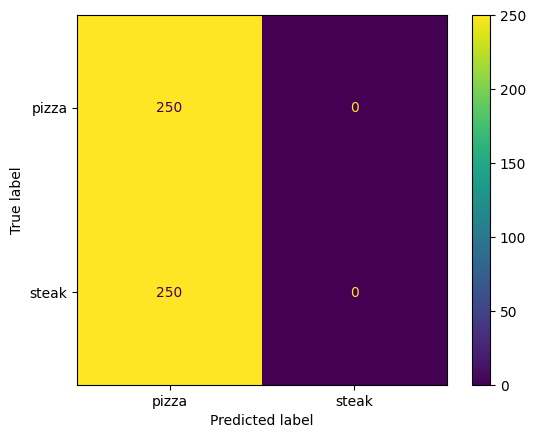

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_pred_proba = mobilenet_cnn1.predict(test_data)
y_pred = y_pred_proba.argmax(axis=1)

y_true = test_data.labels

accuracy = accuracy_score(y_true, y_pred)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_data.class_indices)
disp.plot()

print("Accuracy:", accuracy)
